In [1]:
#Librairies
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

MOVIELENS EXPLORATION

In [2]:
#Ratings
dfratings=pd.read_csv("../data/ratings.csv", sep=',')
display(dfratings.info())
display(dfratings.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 610.4 MB


None

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [3]:
#Ratings

display(dfratings.isnull().any()) #Tableaux sans valeur nulle

#Nombre users
display(dfratings['userId'].value_counts())
#notations récupérées pour 138593 utilisateurs.
#A partir de combien de notes peut-on travailler pour estimer une tendance de gout? 

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

118205    9254
8405      7515
82418     5646
121535    5520
125794    5491
          ... 
89305       20
110463      20
96990       20
134747      20
6526        20
Name: userId, Length: 138493, dtype: int64

In [4]:
#Transformation timestamp
dfratings['date']=pd.to_datetime(dfratings['timestamp'], unit='s')
dfratings.drop(columns=['timestamp'])
#Annee
dfratings['year']=dfratings['date'].dt.year
#Mois
dfratings['month']=dfratings['date'].dt.month
#heure
dfratings['heure']=dfratings['date'].dt.hour
#Données récupérées entre 1995 et 2015


In [5]:
#Nombre de votes et moyenne par utilisateur
ratingsbyuser = pd.DataFrame(dfratings.groupby('userId')['rating'].mean())
ratingsbyuser['nombre de film'] = pd.DataFrame(dfratings.groupby('userId')['rating'].count())

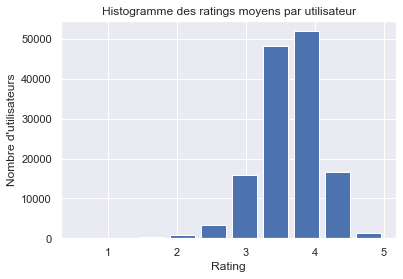

In [6]:
#Visualisation
#Histogramme des ratings moyens par utilisateur
plt.hist(ratingsbyuser['rating'], rwidth=0.8, histtype = 'barstacked')
plt.xlabel("Rating")
plt.ylabel("Nombre d'utilisateurs")
plt.title("Histogramme des ratings moyens par utilisateur");

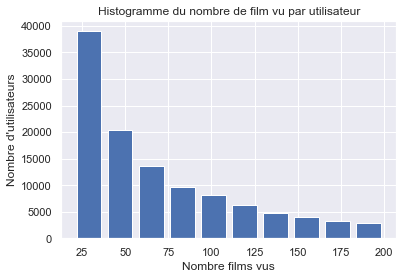

In [7]:
#Nombre de films vu par utilisateur
plt.hist(ratingsbyuser['nombre de film'], rwidth=0.8, range = (20, 200), histtype = 'barstacked')
plt.xlabel("Nombre films vus")
plt.ylabel("Nombre d'utilisateurs")
plt.title("Histogramme du nombre de film vu par utilisateur");

In [8]:
#movies
dfmovies=pd.read_csv("../data/movies.csv", sep=',')
display(dfmovies.info())
display(dfmovies.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB


None

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
#movies
dfmovies.isnull().any()
#Tableaux sans valeur nulle

movieId    False
title      False
genres     False
dtype: bool

In [10]:
#GenomeScores

dfgenome=pd.read_csv("../data/genome-scores.csv")
display(dfgenome.head(5))
display(dfgenome.info())

,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11709768 entries, 0 to 11709767
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 268.0 MB


None

In [11]:
#GenomeScores
display(dfgenome.isnull().sum().sum())
print('Le fichier tags contient',dfgenome.isnull().sum().sum(), 'valeur nulles')
display(dfgenome.value_counts(dfgenome['movieId']))

0

Le fichier tags contient 0 valeur nulles


movieId
1         1128
26203     1128
26134     1128
26138     1128
26139     1128
          ... 
3924      1128
3925      1128
3926      1128
3927      1128
131170    1128
Length: 10381, dtype: int64

In [12]:
#GenomeTags
dftags=pd.read_csv("../data/genome-tags.csv")
display(dftags.head(5))
display(dftags.info())

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


None

In [13]:
#GenomeTags
display(dftags['tag'].describe())
display(dftags['tag'].unique())
display(dftags['tag'].value_counts())

count     1128
unique    1128
top        007
freq         1
Name: tag, dtype: object

array(['007', '007 (series)', '18th century', ..., 'wwii', 'zombie',
       'zombies'], dtype=object)

007                                    1
oscar (best directing)                 1
oscar (best picture)                   1
oscar (best music - original song)     1
oscar (best music - original score)    1
                                      ..
father daughter relationship           1
father son relationship                1
father-son relationship                1
fbi                                    1
zombies                                1
Name: tag, Length: 1128, dtype: int64

In [14]:
#GenomeTags
display(dftags.isnull().sum().sum())
print('Le fichier tags contient',dftags.isnull().sum().sum(), 'valeur nulles')

0

Le fichier tags contient 0 valeur nulles


MOVIELENS VISUALISATION

In [15]:
# Split By Genre

dfmovies['individual_genres'] = dfmovies['genres'].str.split('|')
dfmovies_genres = dfmovies.explode('individual_genres')
dfmovies_genres

,movieId,title,genres,individual_genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Animation
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Children
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Comedy
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Fantasy
...,...,...,...,...
27275,131258,The Pirates (2014),Adventure,Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed),(no genres listed)
27277,131262,Innocence (2014),Adventure|Fantasy|Horror,Adventure
27277,131262,Innocence (2014),Adventure|Fantasy|Horror,Fantasy


In [16]:
# Get average rating by movie

dfratings.sort_values(by="movieId",ascending=True)
dfratings = dfratings.drop(['userId','timestamp'], axis = 1)
dfratings = round(dfratings.groupby(["movieId"]).mean(),1)
average_rating = dfratings
average_rating

,rating,year,month,heure
movieId,,,,
1,3.9,2002.9,6.5,12.5
2,3.2,2002.4,6.9,12.6
3,3.2,1999.9,6.3,12.8
4,2.9,1998.7,7.0,12.7
5,3.1,2000.0,6.4,12.8
...,...,...,...,...
131254,4.0,2015.0,3.0,19.0
131256,4.0,2015.0,3.0,19.0
131258,2.5,2015.0,3.0,19.0


In [17]:
# Use number of votes as popularity indicator

popularity_df = pd.read_csv ('../data/ratings.csv')
popularity_df = popularity_df.drop(['userId','timestamp'], axis = 1)
popularity_df = popularity_df.groupby(["movieId"]).count()
popularity_df = popularity_df.sort_values(by="rating",ascending=False)
popularity_df = popularity_df.rename(columns={'rating': 'popularity'})
popularity_df

,popularity
movieId,
296,67310
356,66172
318,63366
593,63299
480,59715
...,...
110807,1
110811,1
78984,1


In [18]:
# Merge all that

global_df = average_rating.merge(right=popularity_df,on='movieId',how='left')
global_df_with_genres = global_df.merge(right=dfmovies_genres,on='movieId',how='left')
global_df_with_genres

,movieId,rating,year,month,heure,popularity,title,genres,individual_genres
0,1,3.9,2002.9,6.5,12.5,49695,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure
1,1,3.9,2002.9,6.5,12.5,49695,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Animation
2,1,3.9,2002.9,6.5,12.5,49695,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Children
3,1,3.9,2002.9,6.5,12.5,49695,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Comedy
4,1,3.9,2002.9,6.5,12.5,49695,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Fantasy
...,...,...,...,...,...,...,...,...,...
53414,131258,2.5,2015.0,3.0,19.0,1,The Pirates (2014),Adventure,Adventure
53415,131260,3.0,2015.0,3.0,19.0,1,Rentun Ruusu (2001),(no genres listed),(no genres listed)
53416,131262,4.0,2015.0,3.0,20.0,1,Innocence (2014),Adventure|Fantasy|Horror,Adventure
53417,131262,4.0,2015.0,3.0,20.0,1,Innocence (2014),Adventure|Fantasy|Horror,Fantasy


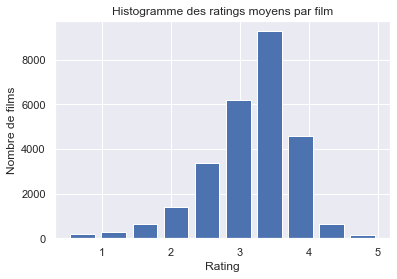

In [19]:
# histogramme des niveaux de ratings moyens par film
plt.hist(global_df['rating'], rwidth=0.8, histtype = 'barstacked')
plt.xlabel("Rating")
plt.ylabel("Nombre de films")
plt.title("Histogramme des ratings moyens par film");

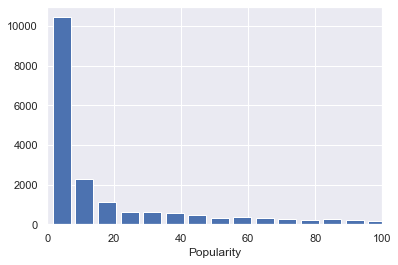

In [20]:
plt.hist(global_df['popularity'], bins=10000, rwidth=0.8);
plt.xlabel("Popularity")
plt.xlim(0,100);

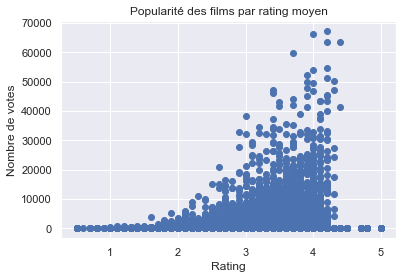

In [21]:
# scatter plot nombre de votes (popularité) x ratings moyens
plt.scatter(global_df['rating'],global_df['popularity'], cmap = 'viridis')
plt.xlabel("Rating")
plt.ylabel("Nombre de votes")
plt.title("Popularité des films par rating moyen");

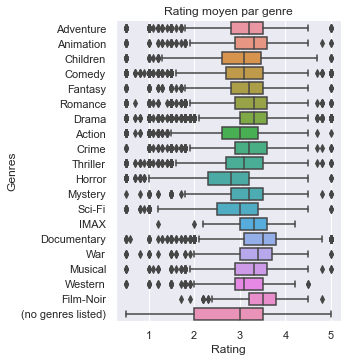

In [22]:
# box plot des ratings moyens par genre
sns.catplot(x='rating', y='individual_genres', kind='box', data=global_df_with_genres)
plt.xlabel("Rating")
plt.ylabel("Genres")
plt.title("Rating moyen par genre");

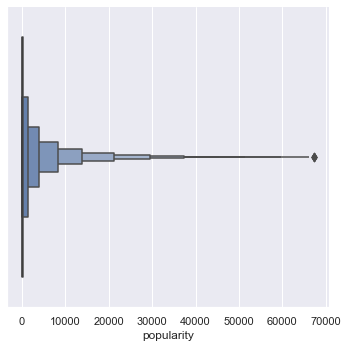

In [23]:
sns.catplot(x='popularity', kind='boxen', data=global_df_with_genres);

TAGS EXPLORATION

In [24]:
#classement des tags par nombre de fois où ils ont été attribués
tags=pd.read_csv("../data/tags.csv")
tags["tag"].value_counts()

sci-fi                           3384
based on a book                  3281
atmospheric                      2917
comedy                           2779
action                           2657
                                 ... 
Paul Adelstein                      1
the wig                             1
killer fish                         1
genetically modified monsters       1
topless scene                       1
Name: tag, Length: 38643, dtype: int64

In [25]:
#On garde seulement les 200 plus utilisés suffisants pour classer les films

top_all_tag=tags["tag"].value_counts()[0:200].index
print(top_all_tag)

Index(['sci-fi', 'based on a book', 'atmospheric', 'comedy', 'action',
       'surreal', 'BD-R', 'twist ending', 'funny', 'dystopia',
       ...
       'creepy', 'Robin Williams', 'talking animals', 'philosophical',
       'touching', 'might like', 'teen', 'Martin Scorsese', 'gothic',
       'cyberpunk'],
      dtype='object', length=200)


In [26]:
#Le genome donne une note pour chaque tage. On retire tous ceux qui ne sont pas intéressants avec le genome (format, acteurs etc...)

top_all_tag=top_all_tag.drop(['BD-R','might like','Robin Williams','Martin Scorsese','Studio Ghibli','stylized','talking animals'])
top_all_tag=top_all_tag.drop(['nudity (topless)','imdb top 250','Betamax','social commentary','CLV','thought-provoking'])
top_all_tag=top_all_tag.drop(['adapted from:book','Criterion'])
top_all_tag=top_all_tag.drop(['DVD-Video','less than 300 ratings','Quentin Tarantino','black and white','R','erlend\'s DVDs','Johnny Depp'])
top_all_tag=top_all_tag.drop([ 'Brad Pitt','Bruce Willis','Tumey\'s DVDs', 'seen more than once','Disney'])
top_all_tag=top_all_tag.drop([ 'Tom Hanks','DVD-RAM','Morgan Freeman',  'Japan','Pixar','Nudity (Full Frontal)','Nudity (Topless - Brief)'])
top_all_tag=top_all_tag.drop([ 'Nudity (Topless - Notable)','70mm','New York City'])
top_all_tag=top_all_tag.drop(['Edward Norton', 'Bill Murray', 'Christian Bale', 'Leonardo DiCaprio',  'Clint Eastwood',
                                   'Tim Burton', 'British','chick flick','Samuel L. Jackson', 
       'Nudity (Full Frontal - Notable)', 'Jim Carrey', 'Tom Cruise', 'BD-Video', 'Matt Damon', 'Robert Downey Jr.', 'Stanley Kubrick', 'Natalie Portman',
       'Robert De Niro', 'Harrison Ford'])
top_all_tag=top_all_tag.drop(['Nudity (Topless)'])


In [27]:
print(top_all_tag[0:20])
print(top_all_tag[20:40])
print(top_all_tag[40:60])
print(top_all_tag[60:80])
print(top_all_tag[80:100])
print(top_all_tag[100:])

Index(['sci-fi', 'based on a book', 'atmospheric', 'comedy', 'action',
       'surreal', 'twist ending', 'funny', 'dystopia', 'quirky', 'dark comedy',
       'classic', 'psychology', 'fantasy', 'time travel', 'romance',
       'visually appealing', 'disturbing', 'aliens', 'violence'],
      dtype='object')
Index(['drugs', 'true story', 'adventure', 'animation', 'space', 'dark',
       'superhero', 'black comedy', 'World War II', 'post-apocalyptic',
       'cult film', 'satire', 'tense', 'thriller', 'drama', 'predictable',
       'politics', 'bittersweet', 'horror', 'based on a true story'],
      dtype='object')
Index(['revenge', 'boring', 'cinematography', 'great soundtrack',
       'serial killer', 'music', 'coming of age', 'high school', 'comic book',
       'religion', 'violent', 'zombies', 'mental illness', 'anime',
       'franchise', 'dreamlike', 'alternate reality', 'friendship', 'murder',
       'crime'],
      dtype='object')
Index(['war', 'nonlinear', 'psychological', 'Oscar

In [28]:
#on compte ce qu'il nous reste

print(top_all_tag.size)

143


In [29]:
#on garde seulement les tags pour le genome de la selection de tags

gen_tg=dftags

#gen_tag=gen_tg.iloc[0,:]

gen_tag=gen_tg[gen_tg["tag"].str.contains(top_all_tag[0])]


#gen_tag=gen_tg[gen_tg["tag"]==top_all_tag]
for i in range(142) :
    print(i)
    print(top_all_tag[i+1])
    gen_temp=gen_tg[gen_tg["tag"]==top_all_tag[i+1]]
    gen_tag=pd.concat([gen_tag,gen_temp])
    gen_tag.info()
#gen_temp.head()

0
based on a book
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 551 to 106
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   3 non-null      int64 
 1   tag     3 non-null      object
dtypes: int64(1), object(1)
memory usage: 72.0+ bytes
1
atmospheric
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 551 to 85
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   4 non-null      int64 
 1   tag     4 non-null      object
dtypes: int64(1), object(1)
memory usage: 96.0+ bytes
2
comedy
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 551 to 229
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   5 non-null      int64 
 1   tag     5 non-null      object
dtypes: int64(1), object(1)
memory usage: 120.0+ bytes
3
action
<class 'pandas.core.frame.DataFrame'>
Int64I

41
cinematography
<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 551 to 211
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   43 non-null     int64 
 1   tag     43 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.0+ KB
42
great soundtrack
<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 551 to 470
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   44 non-null     int64 
 1   tag     44 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.0+ KB
43
serial killer
<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 551 to 902
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   45 non-null     int64 
 1   tag     45 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
44
music
<class 'pandas.core.frame.DataFrame'>
I

101
sexuality
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 551 to 908
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   100 non-null    int64 
 1   tag     100 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.3+ KB
102
assassin
<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 551 to 80
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   101 non-null    int64 
 1   tag     101 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.4+ KB
103
dialogue
<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 551 to 301
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   102 non-null    int64 
 1   tag     102 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.4+ KB
104
soundtrack
<class 'pandas.core.frame.DataFrame'>
Int64Ind

In [30]:
#On verifie le dataframe obtenu

gen_tag.head(250)
gen_tag.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 551 to 279
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   135 non-null    int64 
 1   tag     135 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.2+ KB


In [31]:
movies=dfmovies
mov_tag=movies.merge(right=dfgenome,on="movieId",how='inner')
mov_tag=mov_tag.merge(right=gen_tag,on="tagId",how='inner')

mov_tag.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1401435 entries, 0 to 1401434
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   movieId            1401435 non-null  int64  
 1   title              1401435 non-null  object 
 2   genres             1401435 non-null  object 
 3   individual_genres  1401435 non-null  object 
 4   tagId              1401435 non-null  int64  
 5   relevance          1401435 non-null  float64
 6   tag                1401435 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 85.5+ MB


In [32]:
#on verifie que les films ont les genomes pour tous les tags

mov_tag["tagId"].value_counts()

19      10381
780     10381
850     10381
849     10381
847     10381
        ...  
354     10381
348     10381
336     10381
331     10381
1128    10381
Name: tagId, Length: 135, dtype: int64

In [33]:
print(11709768/10381)
print(1401435/10381)
 #On retombe bien sur 135 tags donnés 10381 fois

1128.0
135.0


In [34]:
#Pour un genre, ici Aventure pour tester, on cherche les tags qui ont la meilleure note et on regarde les notes en boxplot.
mov_Adventure=mov_tag[mov_tag["genres"].str.contains("Adventure")]
mov_Adventure.head()

,movieId,title,genres,individual_genres,tagId,relevance,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",19,0.67050,action
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]",19,0.64600,action
7,8,Tom and Huck (1995),Adventure|Children,"[Adventure, Children]",19,0.49425,action
9,10,GoldenEye (1995),Action|Adventure|Thriller,"[Action, Adventure, Thriller]",19,0.96600,action
12,13,Balto (1995),Adventure|Animation|Children,"[Adventure, Animation, Children]",19,0.18675,action


Index(['original', 'adventure', 'story', 'dialogue', 'great ending', 'action',
       'visually appealing', 'predictable', 'family', 'fantasy'],
      dtype='object', name='tag')


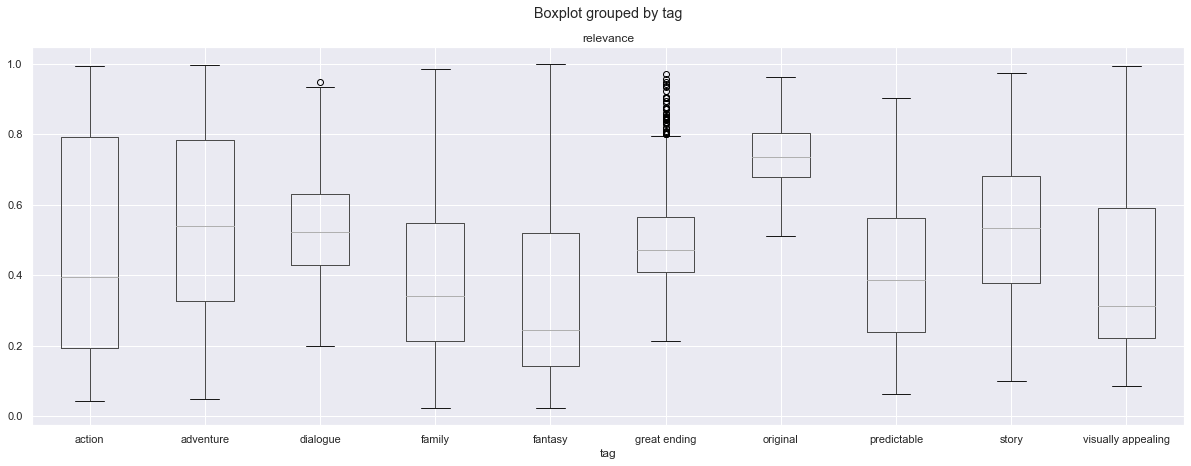

In [35]:
mov_Adventure.groupby('tag').agg("mean").sort_values("relevance",ascending=False)[0:10]
top_tag_adv=mov_Adventure.groupby('tag').agg("mean").sort_values("relevance",ascending=False).index[0:10]

print(top_tag_adv)

mov_Adventure[mov_Adventure['tag'].isin(top_tag_adv)].boxplot(column= 'relevance', by='tag', figsize= (20,7));
#mov_Adventure[mov_Adventure['relevance']>0.4].boxplot(column= 'relevance', by='tag', figsize= (20,7));


In [36]:
#On cherche les tags les mieux notés pour chaque genre, avec dans l'idée que ce seront les tags les plus intéressant par genre pour le choix du film

list_genres=["Action", "Adventure", "Animation", "Children\'s", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir",
             "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"]



for g in range(len(list_genres)) :
    print(g)
    mov_bygenres=mov_tag[mov_tag["genres"].str.contains(list_genres[g])]
    mov_bygenres.groupby('tag').agg("mean").sort_values("relevance",ascending=False)[0:10]

    top_tag=mov_bygenres.groupby('tag').agg("mean").sort_values("relevance",ascending=False).index[0:10]
    #mov_bygenres[mov_bygenres['tag'].isin(top_tag)].boxplot(column= 'relevance', by='tag', figsize= (20,7));
    print(top_tag)

0
Index(['original', 'action', 'dialogue', 'great ending', 'story',
       'predictable', 'violence', 'revenge', 'visually appealing', 'suspense'],
      dtype='object', name='tag')
1
Index(['original', 'adventure', 'story', 'dialogue', 'great ending', 'action',
       'visually appealing', 'predictable', 'family', 'fantasy'],
      dtype='object', name='tag')
2
Index(['animation', 'original', 'story', 'dialogue', 'great ending', 'family',
       'visually appealing', 'adventure', 'weird', 'friendship'],
      dtype='object', name='tag')
3
Index([], dtype='object', name='tag')
4
Index(['original', 'comedy', 'dialogue', 'great ending', 'funny',
       'predictable', 'story', 'family', 'humorous', 'weird'],
      dtype='object', name='tag')
5
Index(['original', 'great ending', 'dialogue', 'corruption', 'violence',
       'crime', 'murder', 'suspense', 'violent', 'story'],
      dtype='object', name='tag')
6
Index(['documentary', 'original', 'corruption', 'great ending', 'weird',
       '

In [37]:
########## Dummification du Top50 des Tags ##########

In [38]:
import pandas as pd

df = pd.read_csv("../data/tags.csv")
df = df[["movieId","tag"]]
df.drop_duplicates(inplace=True)
df

,movieId,tag
0,4141,Mark Waters
1,208,dark hero
2,353,dark hero
3,521,noir thriller
4,592,dark hero
...,...,...
465556,7045,Scary Movies To See on Halloween
465558,7164,visually appealing
465559,55999,dragged
465561,55999,quirky


In [39]:
tag_count = df['tag'].value_counts()
top_50_tags = tag_count.head(50)
top_50_tags

BD-R                      2328
nudity (topless)          1222
based on a book           1205
CLV                       1198
Betamax                   1080
Criterion                  896
DVD-Video                  855
comedy                     729
erlend's DVDs              729
less than 300 ratings      719
funny                      673
Tumey's DVDs               640
adapted from:book          595
DVD-RAM                    567
boring                     565
Nudity (Topless)           534
R                          527
action                     495
romance                    453
murder                     441
atmospheric                439
BD-Video                   412
drama                      408
movie to see               404
70mm                       390
classic                    379
predictable                379
might like                 368
reviewed                   357
nudity (full frontal)      348
sci-fi                     346
quirky                     343
library 

In [40]:
df_dummy = pd.get_dummies(tag_count.head(50).index, prefix="TAG ")
df_dummy

,TAG _70mm,TAG _BD-R,TAG _BD-Video,TAG _Betamax,TAG _CLV,TAG _Criterion,TAG _DVD-R,TAG _DVD-RAM,TAG _DVD-Video,TAG _National Film Registry,...,TAG _religion,TAG _reviewed,TAG _romance,TAG _sci-fi,TAG _seen more than once,TAG _slow,TAG _stylized,TAG _surreal,TAG _tense,TAG _true story
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Dummification des tags

In [41]:
genome = pd.read_csv("../data/genome-scores.csv")
toprelevance = genome.groupby('tagId').agg(sum).sort_values('relevance',ascending=False).head(50).index
toprelevance

Int64Index([ 742,  646,  468,  302,  452,  188,  972,  971,  464,  445,  867,
             169,  277,  270,  602,  640,  801,  299,   21, 1008,  323, 1104,
            1091,  844,  777,  807,  212,  465,  195,  472, 1070,  415,  936,
             220,  536,  351,  999,  203,   22,  992,  493,  378,  750, 1051,
             610,  240, 1064,  554,  258,  982],
           dtype='int64', name='tagId')

In [42]:
genome = genome[genome['tagId'].isin(toprelevance)]
genome

,movieId,tagId,relevance
20,1,21,0.33025
21,1,22,0.28250
168,1,169,0.20525
187,1,188,0.48600
194,1,195,0.59000
...,...,...,...
11709690,131170,1051,0.74175
11709703,131170,1064,0.25200
11709709,131170,1070,0.18775
11709730,131170,1091,0.41600


In [43]:
import pandas as pd
genome2 = pd.get_dummies(genome,columns=['tagId'],prefix="TAG ")
genome2.iloc[:,2:]#*genome2['relevance']

,TAG _21,TAG _22,TAG _169,TAG _188,TAG _195,TAG _203,TAG _212,TAG _220,TAG _240,TAG _258,...,TAG _972,TAG _982,TAG _992,TAG _999,TAG _1008,TAG _1051,TAG _1064,TAG _1070,TAG _1091,TAG _1104
20,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
168,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
187,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
194,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11709690,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
11709703,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11709709,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11709730,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [44]:
genome3=genome2[genome2['relevance']>0.7]
genome3

,movieId,relevance,TAG _21,TAG _22,TAG _169,TAG _188,TAG _195,TAG _203,TAG _212,TAG _220,...,TAG _972,TAG _982,TAG _992,TAG _999,TAG _1008,TAG _1051,TAG _1064,TAG _1070,TAG _1091,TAG _1104
202,1,0.92625,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
219,1,0.78025,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
414,1,0.82300,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
444,1,0.83550,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
451,1,0.73375,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11709381,131170,0.88025,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11709416,131170,0.88500,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11709638,131170,0.81525,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
11709690,131170,0.74175,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [45]:
genome3.groupby('movieId').agg(sum)

# Priorité :
# Limiter à 10 films et 10 tags
# Multiplier relevance par tag (résoudre le problème)
# Limiter à un seuil de votes (à déterminer)
# Rajouter note moyenne

#-----------------

# Secondaire:
# Rajouter les films restants avec 0s partout
# Remplacer les tags_id par les vrais tags
# Pareil pour movies

,relevance,TAG _21,TAG _22,TAG _169,TAG _188,TAG _195,TAG _203,TAG _212,TAG _220,TAG _240,...,TAG _972,TAG _982,TAG _992,TAG _999,TAG _1008,TAG _1051,TAG _1064,TAG _1070,TAG _1091,TAG _1104
movieId,,,,,,,,,,,,,,,,,,,,,
1,8.41275,0,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,3.24975,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.77900,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1.41750,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,12.77350,0,0,0,0,1,0,0,0,1,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130490,1.81500,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130496,2.22075,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130840,3.20500,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
